# Project Milestone 2 - miraculouscobras420

**The notebook that you will start to examine now has been prepared for you to have information about how we will process the data we use within our project.**

## Importing necessary libraries and extracting data

Initially we will import libraries to use for our project
   - **pandas**: In order to analyze csv files and for data analysis
   - **datetime**: To convert the object date columns to datetime when necessary
   - **numpy**: To implement scientific computing operations when necessary
   - **matplotlib**: In order to visualize our findings
   - **pytz**: In order to show Switzerland Timezone in the beginning of the analysis
   - **tarfile**: In order to extract files from dataset folder in order to use for necessary operations
   - **gzip**: In order to extract review and rating txt files
   - **shutil**: In order to extract txt.gz files in which shutil supports file copying 


In [1]:
import pandas as pd
import numpy as np
import gzip as gunzip
import shutil
from matplotlib import pyplot as plt
import seaborn as sns
from googletrans import Translator
pd.set_option('display.max_rows', 100)  # since the file will include more than 5000 lines we want to limit the max row number to display
from datetime import datetime
import pytz
import tarfile
print(datetime.today().strftime("%d-%b-%Y %a"), "Project Milestone 2 Notebook")
tz_Suisse = pytz.timezone('Europe/Zurich')
current_time= datetime.now(tz_Suisse)
print("Lausanne Time : ", current_time.strftime("%H:%M:%S"))

18-Nov-2022 Fri Project Milestone 2 Notebook
Lausanne Time :  14:49:33


In [2]:
# The datapath is going to be a constant to reach our data 
DATAPATH = '../../Applied_Data_Analysis/dataset/'

In the beginning, datasets for **Beer Advocate**, **Rate Beer**, and **Matched Beers** are stored as gunzip files
In order to illustrate, data we are going to use is now stored in dataset folder.
- **dataset/**
    - matched_beer_data.tar.gz
    - BeerAdvocate.tar.gz
    - RateBeer.tar.gz

Now, we are going to extract files from the gunzipped files and make them available to use for our project

In [13]:
# Initially we are going to extract files for matched beers
file = tarfile.open(DATAPATH + 'matched_beer_data.tar.gz')
print("Extracted files for matched beer dataset")
print(file.getnames())
file.extractall(DATAPATH + "matched_beer_data")
file.close()

# Second, we are going to extract files for Beer Advocate
file = tarfile.open(DATAPATH + 'BeerAdvocate.tar.gz')
print("\nExtracted files for Beer Advocate dataset")
print(file.getnames())
file.extractall(DATAPATH + "BeerAdvocate")
file.close()

# Finally, we are going to extract files for Rate Beer
file = tarfile.open(DATAPATH + 'RateBeer.tar.gz')
print("\nExtracted files for Rate Beer dataset")
print(file.getnames())
file.extractall(DATAPATH + "RateBeer")
file.close()

Extracted files for matched beer dataset
['ratings.csv', 'ratings_ba.txt.gz', 'ratings_rb.txt.gz', 'users_approx.csv', 'users.csv', 'beers.csv', 'breweries.csv', 'ratings_with_text_ba.txt.gz', 'ratings_with_text_rb.txt.gz']

Extracted files for Beer Advocate dataset
['beers.csv', 'reviews.txt.gz', 'users.csv', 'breweries.csv', 'ratings.txt.gz']

Extracted files for Rate Beer dataset
['beers.csv', 'reviews.txt.gz', 'users.csv', 'breweries.csv', 'ratings.txt.gz']


In order to illustrate, data is now extracted and available to use
- **dataset/**
    - **matched_beer_data/**
        - ratings.csv
        - ratings_ba.txt.gz
        - ratings_rb.txt.gz
        - users_approx.csv
        - users.csv
        - beers.csv
        - breweries.csv
        - ratings_with_text_ba.txt.gz
        - ratings_with_text_rb.txt.gz
    - **BeerAdvocate/**
        - beers.csv
        - reviews.txt.gz
        - users.csv
        - breweries.csv
        - ratings.txt.gz
    - **RateBeer/**
        - beers.csv
        - reviews.txt.gz
        - users.csv
        - breweries.csv
        - ratings.txt.gz

## Initial look to csv files

### 1. Beer Advocate

In [3]:
BeerAdvocate = pd.read_csv(DATAPATH + 'BeerAdvocate/beers.csv')
# The purpose is to see the beers which have the highest number of reviews 
BeerAdvocate.sort_values('nbr_reviews', inplace = True, ascending=False) 
BeerAdvocate.head(3)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
180458,2093,90 Minute IPA,64,Dogfish Head Brewings & Eats,American Double / Imperial IPA,15548,3899,4.24,94.0,96.0,9.0,4.273975,NaN,0,NaN
226278,11757,Founders Breakfast Stout,1199,Founders Brewing Company,American Double / Imperial Stout,16509,3811,4.47,99.0,100.0,8.3,4.513760,NaN,0,NaN
77815,412,Old Rasputin Russian Imperial Stout,112,North Coast Brewing Co.,Russian Imperial Stout,12194,3722,4.28,95.0,97.0,9.0,4.301165,NaN,0,NaN


<div class="alert alert-block alert-info">
As can be seen above, our data has features that indicate the score it has according to the site, together with the number of reviews and ratings, apart from the beer name, content and brewery information.

In [4]:
BeerAdvocate_users = pd.read_csv(DATAPATH + 'BeerAdvocate/users.csv')
# The purpose is to see the user which made the highest number of reviews in the display
BeerAdvocate_users.sort_values('nbr_reviews', inplace = True, ascending=False) 
BeerAdvocate_users.head(3)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
1286,8970,8970,stonedtrippin.601042,StonedTrippin,1.306577e+09,"United States, Colorado"
967,9944,8768,uclabrewn84.439438,UCLABrewN84,1.268910e+09,"United States, California"
228,12046,7593,sammy.3853,Sammy,1.070276e+09,Canada


<div class="alert alert-block alert-info">
Along with the number of reviews and ratings made by users who comment on beers on the Beer Advocate, we can also access their locations.

In [12]:
BeerAdvocate_breweries = pd.read_csv(DATAPATH + 'BeerAdvocate/breweries.csv')
# The purpose is to order the breweries with respect to their id numbers
BeerAdvocate_breweries.sort_values('id', inplace = True) 
BeerAdvocate_breweries.reset_index(inplace=True, drop = True)
BeerAdvocate_breweries.head(3)

,id,location,name,nbr_beers
0,1,Czech Republic,Plzeňský Prazdroj,24
1,2,"United States, Texas",Yellow Rose Brewing Company,9
2,3,"United States, Louisiana",Abita Brewing Co.,152


<div class="alert alert-block alert-info">
We can use the information about the locations of the brewers and the number of beers they produce when we want to focus on beers from a region in our scenario.

#### **Initial Exploratory Data Analysis for Beer Advocate** 

In [6]:
print("The shape of the Beer Advocate beers dataframe is:", BeerAdvocate.shape)
BeerAdvocate[["nbr_ratings", "nbr_reviews", "avg", "avg_computed", "ba_score", "bros_score" ]].describe()

The shape of the Beer Advocate beers dataframe is: (280823, 15)


,nbr_ratings,nbr_reviews,avg,avg_computed,ba_score,bros_score
count,280823.000000,280823.000000,247994.000000,247982.000000,61200.000000,5702.000000
mean,29.887267,9.221417,3.721034,3.717594,84.633284,84.806559
std,231.010063,68.866445,0.476003,0.464248,4.052723,10.507735
min,0.000000,0.000000,0.000000,1.000000,46.000000,31.000000
25%,1.000000,0.000000,3.500000,3.500000,83.000000,81.000000
50%,2.000000,1.000000,3.780000,3.770000,85.000000,87.000000
75%,8.000000,2.000000,4.010000,4.000000,86.000000,91.000000
max,16509.000000,3899.000000,5.000000,5.000000,100.000000,100.000000


In [7]:
BeerAdvocate.isnull().sum()

beer_id                           0
beer_name                         0
brewery_id                        0
brewery_name                      0
style                             0
nbr_ratings                       0
nbr_reviews                       0
avg                           32829
ba_score                     219623
bros_score                   275121
abv                           36024
avg_computed                  32841
zscore                       240538
nbr_matched_valid_ratings         0
avg_matched_valid_ratings    252551
dtype: int64

<div class="alert alert-block alert-info">
Our purpose in looking for null values here was to observe if the features that are valuable in our project contain missing information. We can see that <code>nbr_ratings</code> and <code>nbr_reviews</code> contain no missing values, so we can use them to explore the statistical properties of the data.

In [43]:
print("*** nbr_ratings ***")
print(f"Mean: { np.mean(BeerAdvocate['nbr_ratings']) }")
print(f"Median: { np.median(BeerAdvocate['nbr_ratings']) }")
print()

print("*** nbr_reviews ***")
print(f"Mean: { np.mean(BeerAdvocate['nbr_reviews']) }")
print(f"Median: { np.median(BeerAdvocate['nbr_reviews']) }")
print()

*** nbr_ratings ***
Mean: 29.887267068580567
Median: 2.0

*** nbr_reviews ***
Mean: 9.221417049173322
Median: 1.0



<div class="alert alert-block alert-info">
As we can see, both samples have a mean that is significantly higher than the median, so we are working with long-tailed distributions. Displaying the histograms for these attributes confirms this finding.

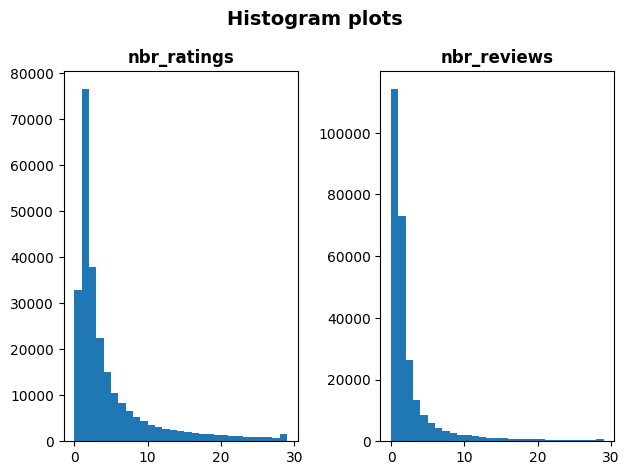

In [47]:
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle("Histogram plots", weight='bold', size=14)
axs[0].hist(BeerAdvocate['nbr_ratings'], bins=np.arange(30))
axs[0].set_title("nbr_ratings", weight='bold', size=12)

axs[1].hist(BeerAdvocate['nbr_reviews'], bins=np.arange(30))
axs[1].set_title("nbr_reviews", weight='bold', size=12)

# Tight layout is used to prevent overlap between the subplots
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
Next, let's consider the breweries and the beers themselves. There are more missing values for these attributes, but we can get a general understanding of the data via counts and histograms:

In [48]:
# How many unique breweries there are?

print(f"Unique brewery IDs: {BeerAdvocate['brewery_id'].nunique()}")
print(f"Unique brewery names: {BeerAdvocate['brewery_name'].nunique()}")

Unique brewery IDs: 14325
Unique brewery names: 14098


<div class="alert alert-block alert-info">
Let's consider the styles of beer present in this database. First, we compute the number of unique entries. After that, we plot a histogram to see how the different styles of beer are represented. In the following plot, each vertical line corresponds to a single style of beer (styles are ordered alphabetically).

Unique beer styles: 104


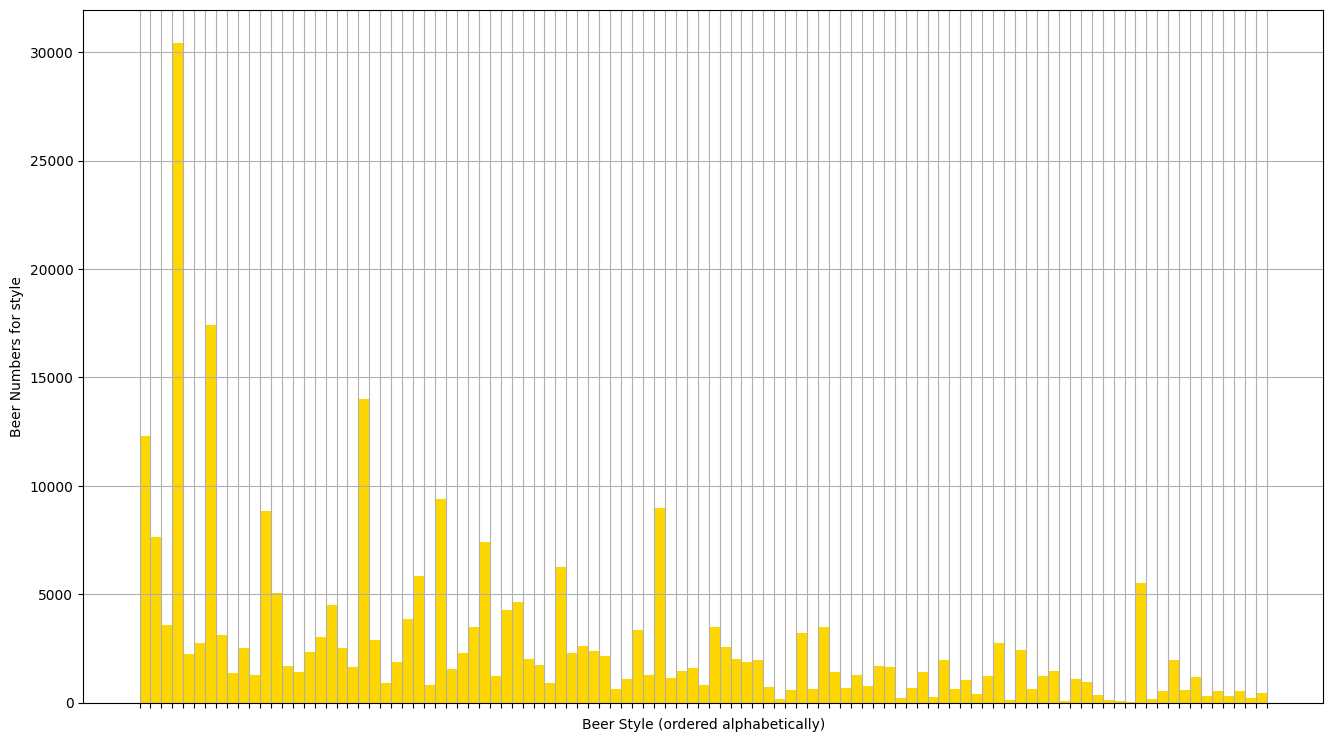

In [51]:
# How many styles of beer?

print(f"Unique beer styles: {BeerAdvocate['style'].nunique()}")
ax=BeerAdvocate['style'].hist(bins=np.arange(BeerAdvocate['style'].nunique()), color = "gold", figsize=(16,9))
ax.set_xticklabels([])
ax.set_xlabel('Beer Style (ordered alphabetically)')
ax.set_ylabel('Beer Numbers for style')

plt.show()

In [53]:
# What are the most popular beer styles?
print("Top 5 beer styles: ")
BeerAdvocate['style'].value_counts()[:5]

Top 5 beer styles: 


American IPA                      30433
American Pale Ale (APA)           17419
Saison / Farmhouse Ale            14006
American Double / Imperial IPA    12279
American Porter                    9377
Name: style, dtype: int64

<div class="alert alert-block alert-info">
Finally, we plot a histogram of number of average rating scores per beer in the dataset.

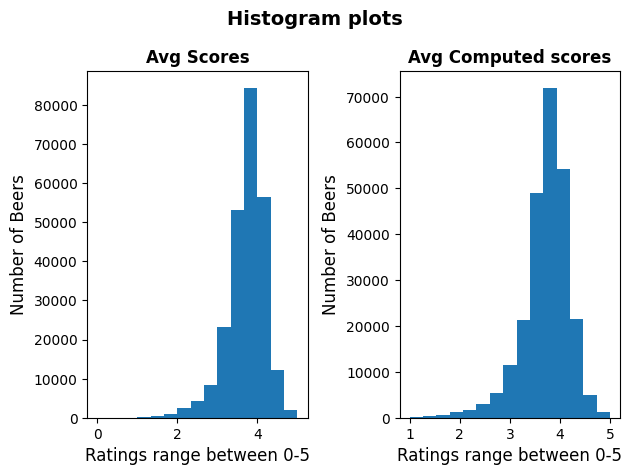

In [8]:
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle("Histogram plots", weight='bold', size=14)
axs[0].hist(BeerAdvocate["avg"], bins= 15)
axs[0].set_title("Avg Scores", weight='bold', size=12)
axs[0].set_ylabel("Number of Beers", size=12)
axs[0].set_xlabel("Ratings range between 0-5", size=12)

axs[1].hist(BeerAdvocate["avg_computed"], bins= 15)
axs[1].set_title("Avg Computed scores", weight='bold', size=12)
axs[1].set_ylabel("Number of Beers",  size=12)
axs[1].set_xlabel("Ratings range between 0-5",size=12)

# Tight layout is used to prevent overlap between the subplots
plt.tight_layout()
plt.show()

### 2. Rate Beer

<div class="alert alert-block alert-info">
We also have the information about the beer, the brewer, and the users who comment and evaluate the site, which we mentioned about the Beer Advocate data for ratebeer.

In [5]:
RateBeer = pd.read_csv(DATAPATH + 'RateBeer/beers.csv')
# The purpose is to see the beers which have the highest number of reviews in the display
RateBeer.sort_values('nbr_ratings', inplace = True, ascending=False) 
RateBeer.head(3)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
428029,2360,Rochefort Trappistes 10,406,Brasserie Rochefort,Abt/Quadrupel,5272,100.0,100.0,4.29,11.3,4.319917,1.590864,5270,4.320114
142867,1267,Guinness Draught,13,St. Jamess Gate (Diageo),Dry Stout,5185,77.0,87.0,3.39,4.2,3.451186,NaN,0,NaN
430399,53,Chimay Bleue (Blue) / Grande Réserve,12,Chimay,Belgian Strong Ale,4843,100.0,100.0,4.00,9.0,4.015858,NaN,0,NaN


In [6]:
RateBeer_users = pd.read_csv(DATAPATH + 'RateBeer/users.csv')
# The purpose is to see the beers which have the highest number of reviews in the display
RateBeer_users.sort_values('nbr_ratings', inplace = True, ascending=False) 
RateBeer_users.head(3)

,nbr_ratings,user_id,user_name,joined,location
16,46749,38926,fonefan,1.150970e+09,Denmark
54,42567,30149,yespr,1.132398e+09,Denmark
161,35316,5328,Ungstrup,1.028714e+09,Denmark


In [7]:
RateBeer_breweries = pd.read_csv(DATAPATH + 'RateBeer/breweries.csv')
# The purpose is to order the breweries with respect to their id numbers
RateBeer_breweries.sort_values('id', inplace = True) 
RateBeer_breweries.reset_index(inplace=True, drop = True)
RateBeer_breweries.head(3)

,id,location,name,nbr_beers
0,1,"United States, Louisiana",Abita Brewing Company,127
1,2,"United States, Massachusetts",Peoples Pint,52
2,3,England,Adnams,143


#### **Initial Exploratory Data Analysis** 

In [12]:
print("The shape of the Rate Beer beers dataframe is:", RateBeer.shape)
RateBeer[["nbr_ratings", "overall_score", "style_score", "avg", "avg_computed"]].describe()

The shape of the Rate Beer beers dataframe is: (442081, 14)


,nbr_ratings,overall_score,style_score,avg,avg_computed
count,442081.000000,104028.000000,104068.000000,395657.000000,396690.000000
mean,16.110337,55.680817,54.986124,3.026580,3.244649
std,80.988812,28.482652,28.655427,0.304503,0.507520
min,0.000000,0.000000,0.000000,0.000000,0.500000
25%,1.000000,34.000000,33.000000,2.870000,3.000000
50%,3.000000,53.000000,51.000000,3.020000,3.300000
75%,9.000000,83.000000,82.000000,3.180000,3.594088
max,5272.000000,100.000000,100.000000,4.520000,5.000000


<div class="alert alert-block alert-info">
As you can see the count values of the each column are not same.

In [13]:
RateBeer.isnull().sum()

beer_id                           0
beer_name                         0
brewery_id                        0
brewery_name                      0
style                             0
nbr_ratings                       0
overall_score                338053
style_score                  338013
avg                           46424
abv                           42094
avg_computed                  45391
zscore                       399853
nbr_matched_valid_ratings         0
avg_matched_valid_ratings    399853
dtype: int64

<div class="alert alert-block alert-info">
Our purpose in looking for null values here was to observe if the features that are valuable in our project contain missing information. We can see that <code>nbr_ratings</code> and <code>nbr_reviews</code> contain no missing values, so we can use them to explore the statistical properties of the data.

In [54]:
print("*** nbr_ratings ***")
print(f"Mean: { np.mean(RateBeer['nbr_ratings']) }")
print(f"Median: { np.median(RateBeer['nbr_ratings']) }")
print()

*** nbr_ratings ***
Mean: 16.11033724588933
Median: 3.0



<div class="alert alert-block alert-info">
As we can see, the sample has a mean that is significantly higher than the median, so we are working with a long-tailed distribution. Displaying the histogram for this attribute confirms this finding.

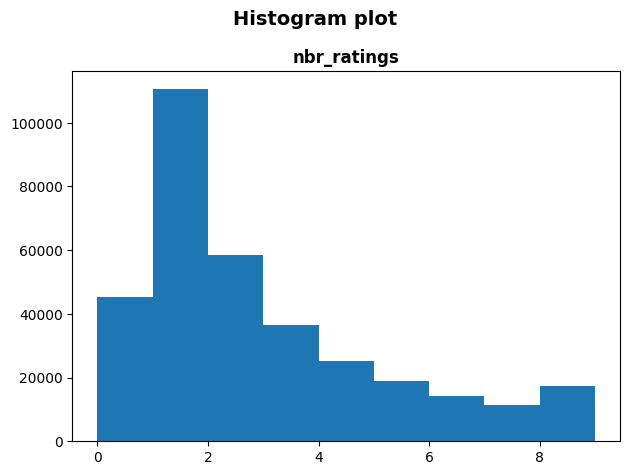

In [60]:
fig, axs = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle("Histogram plot", weight='bold', size=14)
axs.hist(RateBeer['nbr_ratings'], bins=np.arange(10))
axs.set_title("nbr_ratings", weight='bold', size=12)

# Tight layout is used to prevent overlap between the subplots
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
Next, let's consider the breweries and the beers themselves. There are more missing values for these attributes, but we can get a general understanding of the data via counts and histograms:

In [61]:
# How many unique breweries there are?

print(f"Unique brewery IDs: {RateBeer['brewery_id'].nunique()}")
print(f"Unique brewery names: {RateBeer['brewery_name'].nunique()}")

Unique brewery IDs: 23199
Unique brewery names: 23183


<div class="alert alert-block alert-info">
Let's consider the styles of beer present in this database. First, we compute the number of unique entries. After that, we plot a histogram to see how the different styles of beer are represented. In the following plot, each vertical line corresponds to a single style of beer (styles are ordered alphabetically).

Unique beer styles: 94


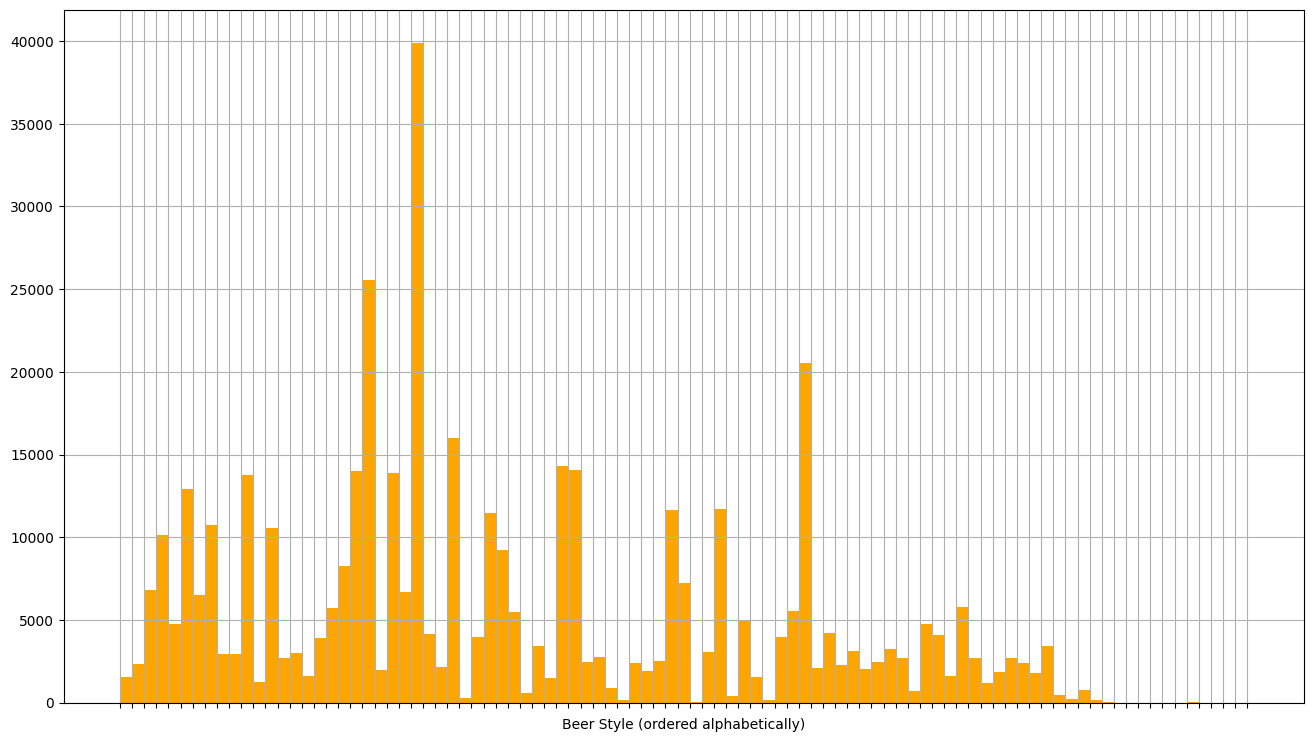

In [64]:
# How many styles of beer?

print(f"Unique beer styles: {RateBeer['style'].nunique()}")
ax=RateBeer['style'].hist(bins=np.arange(RateBeer['style'].nunique()), color = "orange", figsize=(16,9))
ax.set_xticklabels([])
ax.set_xlabel('Beer Style (ordered alphabetically)')

plt.show()

In [65]:
# What are the most popular beer styles?
print("Top 5 beer styles: \n")
RateBeer['style'].value_counts()[:5]

Top 5 beer styles: 



India Pale Ale (IPA)    39898
American Pale Ale       25532
Golden Ale/Blond Ale    20514
Saison                  16012
Bitter                  14329
Name: style, dtype: int64

<div class="alert alert-block alert-info">
Finally, we plot a histogram of number of average rating scores per beer in the dataset.

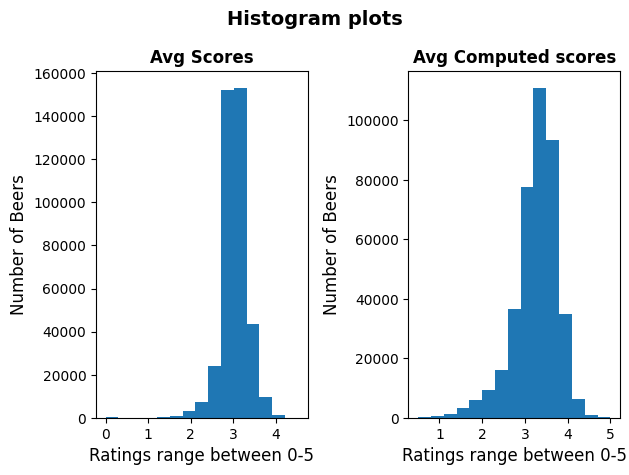

In [14]:
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle("Histogram plots", weight='bold', size=14)
axs[0].hist(RateBeer["avg"], bins= 15)
axs[0].set_title("Avg Scores", weight='bold', size=12)
axs[0].set_ylabel("Number of Beers", size=12)
axs[0].set_xlabel("Ratings range between 0-5", size=12)

axs[1].hist(RateBeer["avg_computed"], bins= 15)
axs[1].set_title("Avg Computed scores", weight='bold', size=12)
axs[1].set_ylabel("Number of Beers",  size=12)
axs[1].set_xlabel("Ratings range between 0-5",size=12)

# Tight layout is used to prevent overlap between the subplots
plt.tight_layout()
plt.show()

### 3. Matched Beer

<div class="alert alert-block alert-info">
In the Matched beer dataset, we have information about the matching beers found on both RateBeer and BeerAdvocate sites.

In [66]:
matchedbeer = pd.read_csv(DATAPATH + 'matched_beer_data/beers.csv')
matchedbeer.head(5)

/var/folders/6s/ck9dfmpx05zfky75grq_ffn00000gn/T/ipykernel_91314/1689577228.py:1: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  matchedbeer = pd.read_csv(DATAPATH + 'matched_beer_data/beers.csv')


,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,...,rb.7,rb.8,rb.9,rb.10,rb.11,rb.12,rb.13,rb.14,scores,scores.1
0,abv,avg,avg_computed,avg_matched_valid_ratings,ba_score,beer_id,beer_name,beer_wout_brewery_name,brewery_id,brewery_name,...,brewery_id,brewery_name,nbr_matched_valid_ratings,nbr_ratings,overall_score,style,style_score,zscore,diff,sim
1,4.8,3.45,3.439866666666666,3.504067796610169,80.0,19827,Legbiter,Legbiter,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.69830388113311,1.0,1.0
2,6.0,3.86,3.88875,3.768333333333333,NaN,20841,St. Patrick's Ale,Patricks Ale St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754083235128498,0.527140514545712,1.0
3,4.2,3.56,3.55609375,3.580416666666667,82.0,20842,St. Patrick's Best,Patricks Best St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.8621191741786616,0.527140514545712,1.0
4,4.8,3.96,3.96,3.96,NaN,22659,St. Patrick's Gold,Patricks Gold St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,4,4,NaN,Amber Ale,NaN,-0.7584908630826819,0.527140514545712,1.0


In [67]:
matchedbeer_users = pd.read_csv(DATAPATH + 'matched_beer_data/users.csv')
matchedbeer_users.head(5)

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,rb,rb.1,rb.2,rb.3,rb.4,rb.5
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
2,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
3,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
4,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing


In [68]:
matchedbeer_breweries = pd.read_csv(DATAPATH + 'matched_beer_data/breweries.csv')
matchedbeer_breweries.head(5)

,ba,ba.1,ba.2,ba.3,rb,rb.1,rb.2,rb.3,scores,scores.1
0,id,location,name,nbr_beers,id,location,name,nbr_beers,diff,sim
1,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.43127548708778424,0.8890620997705575
2,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.52638836243535,0.8635957345058749
3,40360,Northern Ireland,Walled City Brewing Company,6,24866,Northern Ireland,Walled City,3,0.5278523214614645,0.9541834284914152
4,40309,Northern Ireland,Ards Brewing Company,7,13538,Northern Ireland,Ards Brewing Co.,13,0.5543953017091594,0.8960983801420876


In [69]:
matchedbeer_approx = pd.read_csv(DATAPATH + 'matched_beer_data/users_approx.csv')
matchedbeer_approx.head(5)

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,rb,rb.1,rb.2,rb.3,rb.4,rb.5,scores
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower,sim
1,1483009200.0,Spain,3,0,magicuenca.1185749,MAGICuenca,magicuenca,1484046000.0,Spain,89,442761,MAGICuenca91,magicuenca91,0.9045340337332909
2,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel,1.0000000000000004
3,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138,1.0000000000000004
4,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop,1.0000000000000002


#### **Initial Exploratory Data Analysis** 

<div class="alert alert-block alert-info">
First, we have to consider the missing values for each attribute in the dataset.

In [70]:
# missing values
matchedbeer.isnull().sum()

ba              0
ba.1         5355
ba.2         5355
ba.3        17368
ba.4        35141
ba.5            0
ba.6            0
ba.7            0
ba.8            0
ba.9            0
ba.10       44913
ba.11           0
ba.12           0
ba.13           0
ba.14           0
ba.15        5355
rb              0
rb.1         3485
rb.2         3412
rb.3         3412
rb.4            0
rb.5            0
rb.6            0
rb.7            0
rb.8            0
rb.9            0
rb.10           0
rb.11       29942
rb.12           0
rb.13       29942
rb.14        3412
scores          0
scores.1        0
dtype: int64

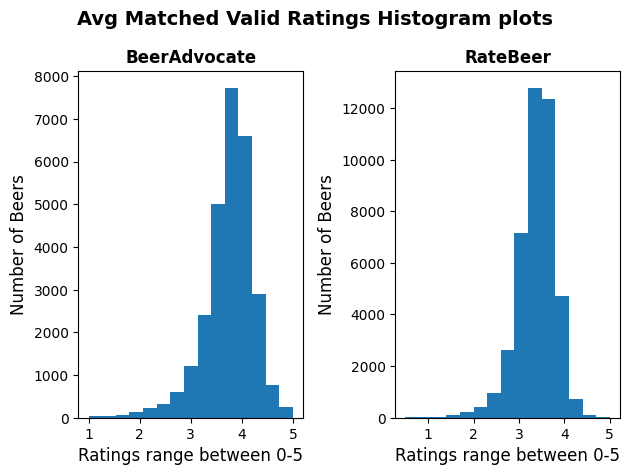

In [65]:
# First we need to drop the first column since it contains textual descriptions of the columns
# By removing that we can analyze the mathematical statistics of the features
matchedbeer = matchedbeer.drop([0])

# Here, we first converted the datatype to float 
# The reason was to prevent any error due to missing values that might cause a runtime error
matchedbeer["ba.3"] = matchedbeer["ba.3"].astype(float)
matchedbeer["rb.3"] = matchedbeer["rb.3"].astype(float)

fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle("Avg Matched Valid Ratings Histogram plots", weight='bold', size=14)
axs[0].hist(matchedbeer["ba.3"], bins= 15)
axs[0].set_title("BeerAdvocate", weight='bold', size=12)
axs[0].set_ylabel("Number of Beers", size=12)
axs[0].set_xlabel("Ratings range between 0-5", size=12)

axs[1].hist(matchedbeer["rb.3"], bins= 15)
axs[1].set_title("RateBeer", weight='bold', size=12)
axs[1].set_ylabel("Number of Beers",  size=12)
axs[1].set_xlabel("Ratings range between 0-5",size=12)

# Tight layout is used to prevent overlap between the subplots
plt.tight_layout()
plt.show()

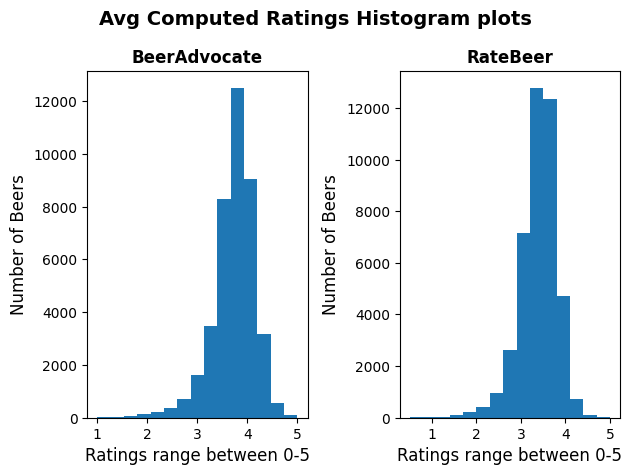

In [67]:
# Here, we first converted the datatype to float 
# The reason was to prevent any error due to missing values that might cause a runtime error
matchedbeer["ba.2"] = matchedbeer["ba.2"].astype(float)
matchedbeer["rb.2"] = matchedbeer["rb.2"].astype(float)

fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle("Avg Computed Ratings Histogram plots", weight='bold', size=14)
axs[0].hist(matchedbeer["ba.2"], bins= 15)
axs[0].set_title("BeerAdvocate", weight='bold', size=12)
axs[0].set_ylabel("Number of Beers", size=12)
axs[0].set_xlabel("Ratings range between 0-5", size=12)

axs[1].hist(matchedbeer["rb.2"], bins= 15)
axs[1].set_title("RateBeer", weight='bold', size=12)
axs[1].set_ylabel("Number of Beers",  size=12)
axs[1].set_xlabel("Ratings range between 0-5",size=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
If we want to make a general comment without making a detailed statistical analysis, when we look at the distribution of the data in the histogram, we can say that two different features regarding average rating value show similar behavior.

## Extracting review txt files for BeerAdvocate and RateBeer

<div class="alert alert-block alert-info">
To review the text files containing the reviews, we will soon normalize the compressed file and then convert the reviews into a dataframe. In addition, we want to reveal the positivity and negativity scores in the comments by performing a sentiment analysis on the comments of the users in the next phase of the project.

To clarify:
We will get the **reviews.txt.gz** file for both RateBeer and BeerAdvocate and apply **csv_creator** function to extract ratings

- **First Step**: **reviews.txt.gz** ==extraction from gunzip==> **reviews.txt**
- **Second Step**: We will read the **reviews.txt** line by line and store the values for its related attributes
- **Third Step**: We will create and return the dataframe as the function output

In [8]:
def csv_creator(keyword):
# First, we need to unzip the reviews.txt.gz file
# Thus, we will first create the unzipped version
    with gunzip.open(DATAPATH + keyword + '/reviews.txt.gz', 'rb') as f_in:
        with open(DATAPATH + keyword + '/reviews.txt', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # The next step will be reading the file and create csv.file that we are gonna use for the project
    reviews =  open(DATAPATH + keyword + '/reviews.txt', 'r')
    lines = reviews.readlines()

    # In order to create the dataframe, we need first read line by line
    # Thus, we need to create arrays first which will store the feature values
    beer_names = []; beer_ids = []; brewery_names = []; brewery_ids = []; styles = []
    dates = []; user_names = []; user_ids = []; overalls = []; ratings = []; review_list = []

    # Here, we are going to iterate the txt file line by line
    # At the beginning of each line if it contains text, the beginning of the line specifies the attribute
    # To illustrate ==> beer_name: Sobraga
    # As you can see the beginning of the line until ':' is the attirbute name and latter is the value
    # Thus, we need to split the line with respect to ':'
    for line in lines:
        words = line.split(":")
        if words[0] == "beer_name":
            beer_names.append(words[1].strip())
        elif words[0] == "beer_id":
            beer_ids.append(words[1].strip())
        elif words[0] == "brewery_name":
            brewery_names.append(words[1].strip())
        elif words[0] == "brewery_id":
            brewery_ids.append(words[1].strip())
        elif words[0] == "style":
            styles.append(words[1].strip())
        elif words[0] == "date":
            dates.append(words[1].strip())
        elif words[0] == "user_name":
            user_names.append(words[1].strip())
        elif words[0] == "user_id":
            user_ids.append(words[1].strip())
        elif words[0] == "overall":
            overalls.append(words[1].strip())
        elif words[0] == "rating":
            ratings.append(words[1].strip()) 

        # The need to write a different snippet for the text was about the usage of ':' in the reviews
        # In some of the reviews, we see multiple usage
        # Thus, we need to approach the problem with slightly modified verison    
        elif words[0] == "text":
            review = ' '
            for index, word in enumerate(words):
                if index != 0:
                    if index != len(words) - 1:
                        review += (word + ":")
                    else:
                        review += word
            review_list.append(review.strip())  

    # Now, we are creating the new csv file by using the lists that we created by iterating over the txt file
    reviews = pd.DataFrame({'beer_name': beer_names, 'beer_id': beer_ids, 'brewery_name': brewery_names, 'brewery_id': brewery_ids, 'style': styles, 
    'date': dates, 'user_name': user_names, 'user_id': user_ids, 'overall': overalls, 'rating': ratings, 'text': review_list})
    return reviews


### 1. Beer Advocate

In [9]:
BeerAdvocate_reviews = csv_creator("BeerAdvocate")
print("Shape of the review csv is: ", BeerAdvocate_reviews.shape)
BeerAdvocate_reviews.head()

Shape of the review csv is:  (2589586, 11)


,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,1440064800,nmann08,nmann08.184925,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,1235127600,StJamesGate,stjamesgate.163714,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,1142247600,mdagnew,mdagnew.19527,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,1101898800,helloloser12345,helloloser12345.10867,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,1093860000,cypressbob,cypressbob.3708,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."


### 2. Rate Beer

In [10]:
# Now, we are creating the new csv file by using the lists that we created by iterating over the txt file
RateBeer_reviews = csv_creator("RateBeer")

print("Shape of the review csv is: ", RateBeer_reviews.shape)
RateBeer_reviews.head()

Shape of the review csv is:  (7122074, 11)


,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,1461664800,Manslow,175852,8,2.00,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,1487329200,MAGICuenca91,442761,8,1.90,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,1466762400,Sibarh,288889,5,1.60,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,1451646000,fombe89,250510,5,1.50,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,1445594400,kevnic2008,122778,7,1.90,Many thanks for this beer to Erzengel. Pours l...


## Joining beers and their locations

### 1. Beer Advocate

In [13]:
BeerAdvocate_with_location = pd.merge(BeerAdvocate,BeerAdvocate_breweries[['id', 'location']], how='inner',left_on=['brewery_id'],right_on=['id'])
BeerAdvocate_with_location.drop(["id"], inplace=True, axis = 1)
BeerAdvocate_with_location.sort_values('nbr_reviews', inplace = True, ascending=False) 
BeerAdvocate_with_location.head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location
0,2093,90 Minute IPA,64,Dogfish Head Brewings & Eats,American Double / Imperial IPA,15548,3899,4.24,94.0,96.0,9.0,4.273975,NaN,0,NaN,"United States, Delaware"
378,11757,Founders Breakfast Stout,1199,Founders Brewing Company,American Double / Imperial Stout,16509,3811,4.47,99.0,100.0,8.3,4.513760,NaN,0,NaN,"United States, Michigan"
777,412,Old Rasputin Russian Imperial Stout,112,North Coast Brewing Co.,Russian Imperial Stout,12194,3722,4.28,95.0,97.0,9.0,4.301165,NaN,0,NaN,"United States, California"
829,7971,Pliny The Elder,863,Russian River Brewing Company,American Double / Imperial IPA,14436,3690,4.60,100.0,100.0,8.0,4.647832,NaN,0,NaN,"United States, California"
937,1093,Two Hearted Ale,287,"Bell's Brewery, Inc.",American IPA,14305,3561,4.26,95.0,90.0,7.0,4.268453,NaN,0,NaN,"United States, Michigan"


### 2. Rate Beer

In [14]:
RateBeer_with_location = pd.merge(RateBeer,RateBeer_breweries[['id', 'location']], how='inner',left_on=['brewery_id'],right_on=['id'])
RateBeer_with_location.drop(["id"], inplace=True, axis = 1)
RateBeer_with_location.sort_values('nbr_ratings', inplace = True, ascending=False) 
RateBeer_with_location.head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location
0,2360,Rochefort Trappistes 10,406,Brasserie Rochefort,Abt/Quadrupel,5272,100.0,100.0,4.29,11.3,4.319917,1.590864,5270,4.320114,Belgium
3,1267,Guinness Draught,13,St. Jamess Gate (Diageo),Dry Stout,5185,77.0,87.0,3.39,4.2,3.451186,NaN,0,NaN,Ireland
65,53,Chimay Bleue (Blue) / Grande Réserve,12,Chimay,Belgian Strong Ale,4843,100.0,100.0,4.00,9.0,4.015858,NaN,0,NaN,Belgium
76,835,Orval,132,Brasserie dOrval,Belgian Ale,4486,99.0,100.0,3.91,6.2,3.927530,NaN,0,NaN,Belgium
78,2530,St. Bernardus Abt 12,439,St. Bernardus Brouwerij,Abt/Quadrupel,4477,100.0,100.0,4.14,10.0,4.158566,NaN,0,NaN,Belgium


## Joining users and their locations

### 1. Beer Advocate

In [15]:
BeerAdvocate_reviews_with_location = pd.merge(BeerAdvocate_reviews,BeerAdvocate_users[['user_id','user_name','location']], how='inner', on=['user_id', 'user_name']) 
BeerAdvocate_reviews_with_location.head(5)

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,overall,rating,text,location
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,1440064800,nmann08,nmann08.184925,3.0,2.88,"From a bottle, pours a piss yellow color with ...","United States, Washington"
1,Americano Imperial Coffee IPA,131646,Siren Craft Brew,31221,English India Pale Ale (IPA),1409306400,nmann08,nmann08.184925,nan,3.50,"On draft, pours a dark brown with red hues, wi...","United States, Washington"
2,Broken Dream,99556,Siren Craft Brew,31221,Milk / Sweet Stout,1409306400,nmann08,nmann08.184925,nan,4.00,"On draft, pours an opaque black with a light b...","United States, Washington"
3,Maiden 2013,127138,Siren Craft Brew,31221,English Barleywine,1409306400,nmann08,nmann08.184925,nan,3.75,"On draft, pours a translucent but very dark re...","United States, Washington"
4,Shattered Dream,135343,Siren Craft Brew,31221,Russian Imperial Stout,1409306400,nmann08,nmann08.184925,nan,4.00,"On draft, pours a dark brown, pretty much opaq...","United States, Washington"


In [16]:
review_samples = BeerAdvocate_reviews_with_location["location"].value_counts()
review_samples[0:15]

United States, Pennsylvania      201864
United States, California        191166
United States, New York          154911
United States, Illinois          136338
United States, Massachusetts     132084
Canada                           126591
United States, Ohio              106818
United States, Texas              85511
United States, Washington         79200
United States, New Jersey         77436
United States, Minnesota          77375
United States, Virginia           76205
United States, Colorado           66969
United States, North Carolina     66448
United States, Michigan           64193
Name: location, dtype: int64

# TODO:Here, we can show a map from tableau for europe and america

### 2. Rate Beer

In [17]:
RateBeer_reviews["user_id"] = RateBeer_reviews["user_id"].astype(int)
RateBeer_reviews_with_location = pd.merge(RateBeer_reviews,RateBeer_users[['user_id','user_name','location']], how='inner', on=['user_id', 'user_name']) 
RateBeer_reviews_with_location.head(5)

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,overall,rating,text,location
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,1461664800,Manslow,175852,8,2.00,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",Poland
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,1430820000,Manslow,175852,6,1.70,"Puszka pita w Gabonie. Kolor jasnosłomkowy, pi...",Poland
2,Régab,19445,Sobraga,3198,Pale Lager,1429437600,Manslow,175852,6,1.90,"Butelka 0,66l alk 4,5% wypite w Gabonie w 2005...",Poland
3,Hilden Cathedral Quarter Beer,130299,Hilden,2099,Irish Ale,1429610400,Manslow,175852,14,3.70,"Butelka od Jacka. Barwa bursztynowa, piana obf...",Poland
4,Hilden Halt,55659,Hilden,2099,Irish Ale,1447326000,Manslow,175852,7,2.50,"Butelka Kolor bursztynowy w oranż wpadający, p...",Poland


In [18]:
review_samples = RateBeer_reviews_with_location["location"].value_counts()
review_samples[0:15]

Denmark                        581975
Canada                         522693
England                        440846
United States, California      315108
Sweden                         283459
Netherlands                    233741
United States, Pennsylvania    222507
Germany                        218794
Norway                         216892
Finland                        191900
United States, Illinois        175503
United States, Texas           163012
Poland                         154391
United States, Florida         147784
United States, Washington      147414
Name: location, dtype: int64

# TODO:Here, we can show a map from tableau for europe and america

## Focusing on United States of America data for Beer Advocate

In [19]:
# Filter rows that includes null location values from the dataset
BeerAdvocate_reviews_with_location = BeerAdvocate_reviews_with_location.dropna(subset=["location"])

# To match the id's with breweries make sure id's are in integer form
BeerAdvocate_reviews_with_location["brewery_id"] = BeerAdvocate_reviews_with_location["brewery_id"].astype(int)

# First filter the unnecessary rows where United States does not occur for each dataframe
# Then inner join the dataframes with respect to brewery id
USA_df =pd.merge(BeerAdvocate_reviews_with_location[BeerAdvocate_reviews_with_location['location'].str.contains("United States")],
BeerAdvocate_breweries[BeerAdvocate_breweries['location'].str.contains("United States")][['id', 'location']], 
how='inner',left_on=['brewery_id'],right_on=['id'])

# Then change name of locations understandable names
USA_df.rename(columns = {'location_x':'user_location', 'location_y': 'brewery_location'}, inplace = True)

# Drop the duplicate column regarding brewery id
USA_df.drop(["id"], inplace=True, axis = 1)
print("Shape of the reviews which includes USA user and brewery location is: ", USA_df.shape)
USA_df.head()

Shape of the reviews which includes USA user and brewery location is:  (1836292, 13)


,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,overall,rating,text,user_location,brewery_location
0,Brewer's Reserve Bourbon Barrel Barleywine,41300,Central Waters Brewing Co.,652,American Barleywine,1322996400,nmann08,nmann08.184925,4.0,4.09,"2011 VintageFrom a bottle, pours a very murky ...","United States, Washington","United States, Wisconsin"
1,Peruvian Morning,40775,Central Waters Brewing Co.,652,American Double / Imperial Stout,1374314400,nmann08,nmann08.184925,4.0,4.19,"2011 Vintage.Pours a dark brown, almost black....","United States, Washington","United States, Wisconsin"
2,Glacial Trail IPA,42189,Central Waters Brewing Co.,652,American IPA,1353150000,ferrari29,ferrari29.320392,3.5,3.48,Beer Poured: from bottle into Lagunitas IPA gl...,"United States, Illinois","United States, Wisconsin"
3,Happy Heron Pale Ale,3086,Central Waters Brewing Co.,652,American Pale Ale (APA),1353150000,ferrari29,ferrari29.320392,3.0,3.15,Beer poured from bottle into a Nonic shaped pi...,"United States, Illinois","United States, Wisconsin"
4,Belgian Blonde Ale,71073,Central Waters Brewing Co.,652,Belgian Strong Pale Ale,1418036400,brentk56,brentk56.6284,3.75,3.81,Appearance: Pours a clear amber with a modest...,"United States, North Carolina","United States, Wisconsin"


## Focusing on United States of America data for Rate Beer

In [20]:
# Filter rows that includes null location values from the dataset
RateBeer_reviews_with_location = RateBeer_reviews_with_location.dropna(subset=["location"])

# To match the id's with breweries make sure id's are in integer form
RateBeer_reviews_with_location["brewery_id"] = RateBeer_reviews_with_location["brewery_id"].astype(int)

# First filter the unnecessary rows where United States does not occur for each dataframe
# Then inner join the dataframes with respect to brewery id
USA_RB_df =pd.merge(RateBeer_reviews_with_location[RateBeer_reviews_with_location['location'].str.contains("United States")],
RateBeer_breweries[RateBeer_breweries['location'].str.contains("United States")][['id', 'location']], 
how='inner',left_on=['brewery_id'],right_on=['id'])

# Then change name of locations understandable names
USA_RB_df.rename(columns = {'location_x':'user_location', 'location_y': 'brewery_location'}, inplace = True)

# Drop the duplicate column regarding brewery id
USA_RB_df.drop(["id"], inplace=True, axis = 1)
print("Shape of the reviews which includes USA user and brewery location is: ", USA_RB_df.shape)
USA_RB_df.head()

Shape of the reviews which includes USA user and brewery location is:  (2395858, 13)


,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,overall,rating,text,user_location,brewery_location
0,Ale Asylum Ambergeddon,59933,Ale Asylum,6879,Amber Ale,1247997600,Cletus,17111,15,3.80,Pours copper with a thin white head. Smells o...,"United States, Connecticut","United States, Wisconsin"
1,Ale Asylum Ballistic IPA,98735,Ale Asylum,6879,India Pale Ale (IPA),1298545200,Cletus,17111,15,3.70,Bottle courtesy of ughsmash. Pours brown with...,"United States, Connecticut","United States, Wisconsin"
2,Ale Asylum Contorter Porter,59932,Ale Asylum,6879,Porter,1280916000,Cletus,17111,14,3.40,Bottle courtesy of motortoddhead. Pours dark ...,"United States, Connecticut","United States, Wisconsin"
3,Ale Asylum Hopalicious,59934,Ale Asylum,6879,American Pale Ale,1247997600,Cletus,17111,14,3.40,Pours copper with a thin white head. Smells o...,"United States, Connecticut","United States, Wisconsin"
4,Ale Asylum Mercy Belgian Grand Cru,95453,Ale Asylum,6879,Belgian Strong Ale,1255773600,Cletus,17111,12,2.90,Pours mahogany with a tan head. Smells of rai...,"United States, Connecticut","United States, Wisconsin"


In [21]:
USA_df.to_csv("USA_Beer_Advocate.csv")
USA_RB_df.to_csv("USA_Rate_Beer.csv")

## USA analysis

## Sentiment Analysis for reviews

The overall score is the user's average of the beer's appearance, aroma, palate, and taste scores. We will try to see if there is a difference between the reviews in terms of negativity and positivity by doing sentiment analysis with sample size of 3000 to illustrate for reviews with an overall score less than 2 and reviews equal to 5.

The model we want to use for sentiment analysis is the twitter-XLM-roBERTa-base for Sentiment Analysis model developed by cardiffnlp.
- https://huggingface.co/cardiffnlp/twitter-xlm-roberta-base-sentiment?text=ADA+is+great

This is a multilingual XLM-roBERTa-base model that has been optimized for sentiment analysis using training data from 198M tweets.




In [30]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import re

# Preprocess text(link placeholders) to convert links in the review if there is tokenizable format 
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# To label sentiment value for the text
def score_calc(row):
  if row["Negative"] > row["Positive"]:
    if row["Negative"] > row["Neutral"]:
      return "Negative"
  if row["Positive"] > row["Negative"]:
    if row["Positive"] > row["Neutral"]:
      return "Positive"  
  else:
    return "Neutral"

# Model we are going to use is defined
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"

#Since it is a pretrained model we can use tokenizer and configuration of the model
#by loading them from AutoTokenizer and AutoConfig
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

#Sequence classification will be used from the pretrained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

# Now, let's create our reviews which overall score is less than 2
USA_df["overall"] = USA_df["overall"].astype(float)
Bad_reviews = USA_df[USA_df["overall"] < 2]["text"].to_list()

# Create the lists which we will store values for the reviews
texts = []; negatives = []; positives = []; neutrals = []
# Initially, we preprocess our text
# Secondly, we tokenized the text with max length to 512 
# The reason is, long texts' tensor can exceed model's tensor size which is 512
# Than, we stored the sentiment analysis scores
# We added the scores with its related review text to the dataframe
for index, review_text in enumerate(Bad_reviews[0:3000]):
    text = preprocess(review_text)
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, max_length=512, truncation=True)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    texts.append(text); negatives.append(scores[0]); neutrals.append(scores[1]); positives.append(scores[2])

# Create the dataframe we are going to store sentiment analysis scores
Bad_ratings_scores = pd.DataFrame({"Review": texts, "Negative": negatives, "Neutral": neutrals, "Positive": positives})

#To apply the sentiment label results for the reviews
Bad_ratings_scores["sentiment_result"] = Bad_ratings_scores.apply(score_calc, axis = 1)
Bad_ratings_scores.head()

,Review,Negative,Neutral,Positive,sentiment_result
0,oooh not so happy with this so very unfortunat...,0.429400,0.260204,0.310395,Negative
1,Upon opening this beer it was made immediately...,0.514477,0.292572,0.192952,Negative
2,"Pours a nearly clear, golden/orange with a sho...",0.677640,0.210036,0.112325,Negative
3,Bottle review. Poured into a pint glass with a...,0.412773,0.325371,0.261856,Negative
4,EDIT:2013 VersionI was pretty excited to try t...,0.468217,0.309703,0.222080,Negative


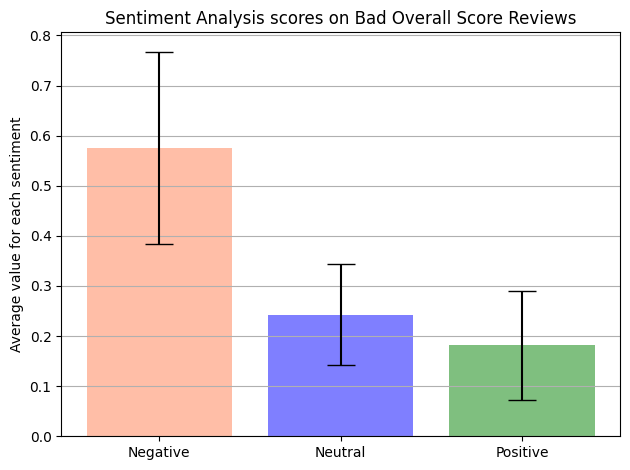

In [41]:
# Calculate the average
# Create lists for the plot
labels = ['Negative', 'Neutral', 'Positive']
x_pos = np.arange(len(labels))
CTEs = [Bad_ratings_scores["Negative"].mean(), Bad_ratings_scores["Neutral"].mean(), Bad_ratings_scores["Positive"].mean()]
error = [Bad_ratings_scores["Negative"].std(), Bad_ratings_scores["Neutral"].std(), Bad_ratings_scores["Positive"].std()]
colors = ['coral', 'blue', 'green']
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', color = colors, capsize=10)
ax.set_ylabel('Average value for each sentiment')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Sentiment Analysis scores on Bad Overall Score Reviews')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

When we compare the emotional analysis average scores of the model we used, we observe that it does a good job of finding **negative** sentiments for reviews with an overall score of 2 and below.

In [33]:
# Now, let's create our reviews which overall score is less than 2
USA_df["overall"] = USA_df["overall"].astype(float)
Good_reviews = USA_df[USA_df["overall"] == 5]["text"].to_list()

# Create the lists which we will store values for the reviews
texts = []; negatives = []; positives = []; neutrals = []

# Initially, we preprocess our text
# Secondly, we tokenized the text with max length to 512 
# The reason is, long texts' tensor can exceed model's tensor size which is 512
# Than, we stored the sentiment analysis scores
# We added the scores with its related review text to the dataframe
for review_text in Good_reviews[1000:4000]:
    text = preprocess(review_text)
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, max_length=512, truncation=True)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    texts.append(text); negatives.append(scores[0]); neutrals.append(scores[1]); positives.append(scores[2])

# Create the dataframe we are going to store sentiment analysis scores
Good_ratings_scores = pd.DataFrame({"Review": texts, "Negative": negatives, "Neutral": neutrals, "Positive": positives})

#To apply the sentiment label results for the reviews
Good_ratings_scores["sentiment_result"] = Good_ratings_scores.apply(score_calc, axis = 1)
Good_ratings_scores.head()


,Review,Negative,Neutral,Positive,sentiment_result
0,"Beautiful dark tan with a hint of red color, b...",0.058516,0.263467,0.678017,Positive
1,I can't imagine a better APA than this. Super ...,0.155009,0.151367,0.693624,Positive
2,This is probably the best sour I've ever had. ...,0.190312,0.210910,0.598778,Positive
3,This stout pours nearly black with a faint gar...,0.299274,0.347607,0.353119,Positive
4,"A gift from dragomni, and greatly appreciated....",0.075493,0.122487,0.802020,Positive


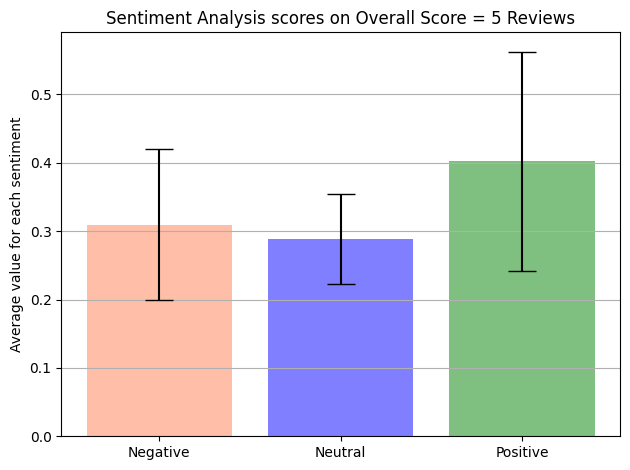

In [42]:
# Calculate the average
# Create lists for the plot
labels = ['Negative', 'Neutral', 'Positive']
x_pos = np.arange(len(labels))
CTEs = [Good_ratings_scores["Negative"].mean(), Good_ratings_scores["Neutral"].mean(), Good_ratings_scores["Positive"].mean()]
error = [Good_ratings_scores["Negative"].std(), Good_ratings_scores["Neutral"].std(), Good_ratings_scores["Positive"].std()]
colors = ['coral', 'blue', 'green']
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', color= colors, capsize=10)
ax.set_ylabel('Average value for each sentiment')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Sentiment Analysis scores on Overall Score = 5 Reviews')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

-   When we compare the emotional analysis average scores of the model we used, we observe that it does a good job of finding **positivity** for reviews with an overall score of 5.


-   When we compare with the previous graph, we see that **negative** content is more dominant in reviews with low overall scores, while **positive** content is less dominant in with the highest(5) score.


- TODO: Bir sonraki adımda yapılacakları yazalım